<a href="https://colab.research.google.com/github/AltynayA/comp-math/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Altynay Ayazbayeva | SE-2421
## Assignment 1 | Computational Mathematics



Chosen function: x^3 - x - 1= 0

Root:  \(1.3247\)



In [ ]:
import pandas as pd
tolerance = 1e-4
num_of_iterations = 100

In [ ]:
def f(x):
    return x**3 - x - 1

In [ ]:
def g(x):
    return x**3 - 1

In [ ]:
def make_table(iterations):
    return pd.DataFrame(
        iterations,
        columns=["Iteration", "Approximation", "f(x)", "Error"]
    )

# BISECTION

Picking interval where f(x) changes the **sign**: f(1)=−1,f(2)=5 so we take the interval of [1,2]

In [ ]:
def bisection(f,a,b,tol,num):
# checker
    if f(a) * f(b) >= 0:
        # print("No root found")
        return None, [], "Invalid interval"
    iterations = []
    for i in range(1,num+1):
        c = (a+b) /2
        fc = f(c)
        error = abs(b - a) / 2
        iterations.append((i, c, fc, error))
        if error < tol:
            return c, iterations, "Tolerance reached"
            # return iterations
        # take interval (c,b)
        if f(a) * f(c) > 0:
            a = c
        # take inteval (a,c)
        else:
            b = c
    return c, iterations, "Maximum iterations reached"

In [ ]:
root, iter_table, status = bisection(f, 1, 2, tolerance, num_of_iterations)
print(f"Root is {root}")
print(status)
make_table(iter_table)

Root is 1.32476806640625
Tolerance reached


,Iteration,Approximation,f(x),Error
0,1,1.500000,0.875000,0.500000
1,2,1.250000,-0.296875,0.250000
2,3,1.375000,0.224609,0.125000
3,4,1.312500,-0.051514,0.062500
4,5,1.343750,0.082611,0.031250
5,6,1.328125,0.014576,0.015625
6,7,1.320312,-0.018711,0.007812
7,8,1.324219,-0.002128,0.003906
8,9,1.326172,0.006209,0.001953
9,10,1.325195,0.002037,0.000977


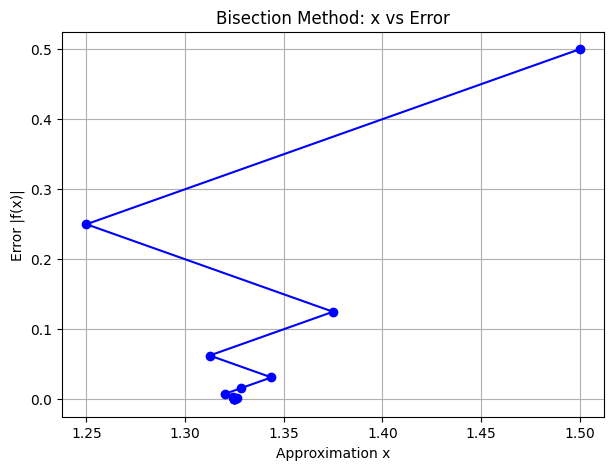

In [ ]:
x_values = [it[1] for it in iter_table]
errors = [it[3] for it in iter_table]
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
plt.plot(x_values, errors, marker='o', linestyle='-', color='blue')
plt.xlabel("Approximation x")
plt.ylabel("Error |f(x)|")
plt.title("Bisection Method: x vs Error")
plt.grid(True)
plt.show()

 Limitations:
* Slow, because the interval halves
* It's required to know the interval where the function changes f(a) * f(b) < 0
 * Multiple roots
 * Picking the interval (sufficient for small intervals)

# FIXED POINT


We need to create g(x) = x
Picking x0 by guess

In [ ]:
def fixed_point(f,g,x0,tol,num):
    iterations = []
    x_prev = x0
    for i in range(1,num+1):
        x_next = g(x_prev)
        error = abs(x_prev - x_next)
        iterations.append((i, x_next, f(x_next), error))
        if error < tol:
            return x_next,iterations, "Tolerance reached"
        x_prev = x_next
    return x_next,  iterations, "Maximum iterations reached"


In [ ]:
root, iter_table, status = fixed_point(f, g,1, tolerance, num_of_iterations)
print(f"Root is {root}")
print(status)
make_table(iter_table)

KeyboardInterrupt: 

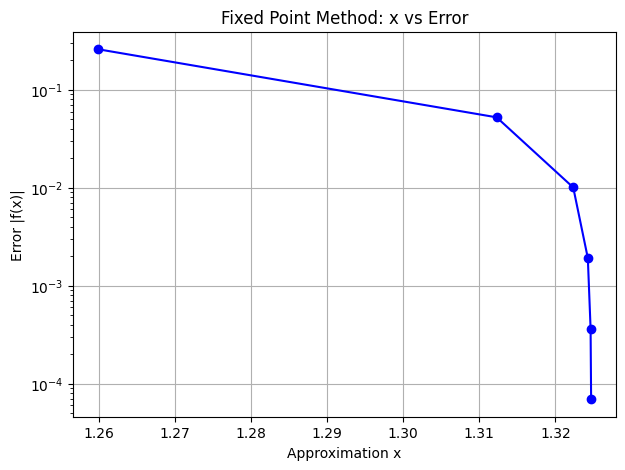

In [ ]:

# import matplotlib.pyplot as plt
x_values = [it[1] for it in iter_table]
errors = [it[3] for it in iter_table]
plt.figure(figsize=(7,5))
plt.plot(x_values, errors, marker='o', linestyle='-', color='blue')
plt.xlabel("Approximation x")
plt.ylabel("Error |f(x)|")
plt.title("Fixed Point Method: x vs Error")
plt.yscale('log')  # optional: log scale for better visualization
plt.grid(True)
plt.show()

Limitations:
* Sensitive to g(x) choice
* Diverges if g prime < 0


# NEWTON RAPHSON

Pick x0 where function is close to f(x) = 0



In [ ]:
def df(x):
  return 3*pow(x,2) - 1

In [ ]:
def newton_raphson(f,df,x0,tol,num):
  iterations = []
  x_prev = x0
  for i in range(1,num+1):
      f_next = f(x_prev)
      denom = df(x_prev)
      if df(x_prev) == 0:
          return x_prev, iterations, "Division by zero"
      x_next  = x_prev - f(x_prev) / df(x_prev)
      error = abs(x_prev - x_next)
      iterations.append([i, x_next, f(x_next), error])
      if error < tol:
          return x_next, iterations, "Tolerance reached"
      x_prev = x_next
  return x_next,iterations, "Maximum iterations reached"


In [ ]:
root, iter_table, status = newton_raphson(f, df,1, tolerance, num_of_iterations)
print(f"Root is {root}")
print(status)
make_table(iter_table)

Root is 1.3247179572447898
Tolerance reached


,Iteration,Approximation,f(x),Error
0,1,1.500000,8.750000e-01,5.000000e-01
1,2,1.347826,1.006822e-01,1.521739e-01
2,3,1.325200,2.058362e-03,2.262569e-02
3,4,1.324718,9.243778e-07,4.822250e-04
4,5,1.324718,1.865175e-13,2.167543e-07


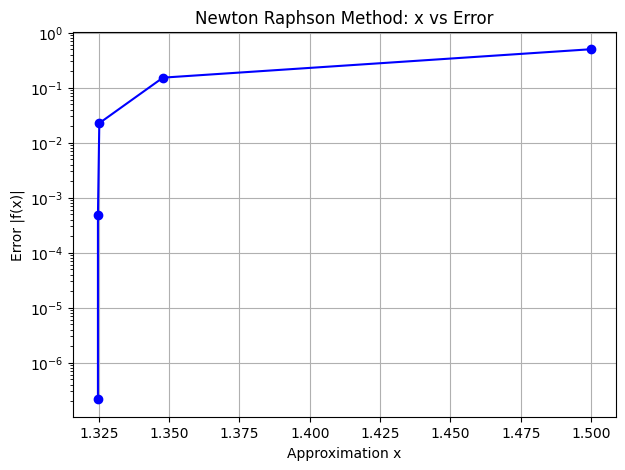

In [ ]:
x_values = [it[1] for it in iter_table]
errors = [it[3] for it in iter_table]
plt.figure(figsize=(7,5))
plt.plot(x_values, errors, marker='o', linestyle='-', color='blue')
plt.xlabel("Approximation x")
plt.ylabel("Error |f(x)|")
plt.title("Newton Raphson Method: x vs Error")
plt.yscale('log')  # optional: log scale for better visualization
plt.grid(True)
plt.show()

Limitations:
* It's required to calculate df(x)
* Doesn't work for non-differentiable functions
* Can diverge
* Fails when df(x) = 0 (denominator)

# SECANT

Picking x0 and x1 as initial guesses

In [ ]:
def secant(f,x0,x1, tol,num):
  iterations = []
  x_prev = x0
  for i in range(1,num+1):
      fx0 = f(x_prev)
      fx1 = f(x1)
      if abs(fx1 - fx0) == 0:
          return x1,iterations, "Division by zero"
      x2 = x1 - f(x1) * (x1 - x0) / (f(x1) - f(x0))
      error = abs(x1-x0)
      iterations.append([i, x1, f(x1), error])
      if error < tol:
          return x2, iterations,  "Tolerance reached"
      x0, x1 = x1, x2
  return x2, iterations, "Maximum iterations reached"

In [ ]:
root, iter_table, status = secant(f, 1,2, tolerance, num_of_iterations)
print(f"Root is {root}")
# stopping criteria details
print(status)
make_table(iter_table)

Root is 1.3247179572446703
Tolerance reached


,Iteration,Approximation,f(x),Error
0,1,2.000000,5.000000e+00,1.000000
1,2,1.166667,-5.787037e-01,0.833333
2,3,1.253112,-2.853630e-01,0.086445
3,4,1.337206,5.388059e-02,0.084094
4,5,1.323850,-3.698115e-03,0.013356
5,6,1.324708,-4.273426e-05,0.000858
6,7,1.324718,3.458222e-08,0.000010


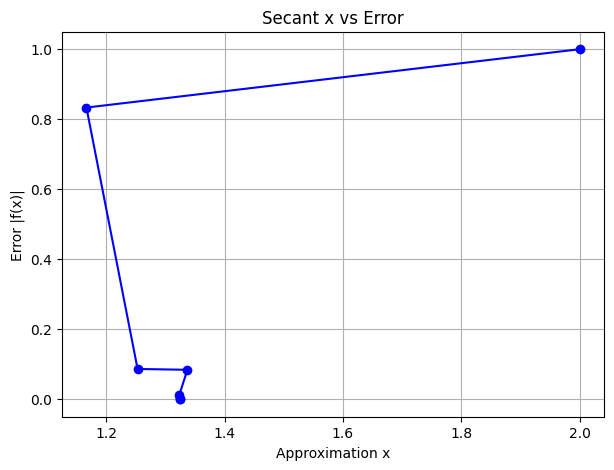

In [ ]:
x_values = [it[1] for it in iter_table]
errors = [it[3] for it in iter_table]

plt.figure(figsize=(7,5))
plt.plot(x_values, errors, marker='o', linestyle='-', color='blue')
plt.xlabel("Approximation x")
plt.ylabel("Error |f(x)|")
plt.title("Secant x vs Error")
plt.grid(True)
plt.show()

Limitations:
* Needing 2 initials guesses close to the root
* Might not converge (no interval)

# FALSE POSITION

picking a and b same as for bisection method f(a) * f(b) < 0

In [ ]:
def false_pos(f,a,b,tol,num):
    if f(a) * f(b) >= 0:
        print(
            "False Position method fails: f(a) and f(b) must have opposite signs."
        )
        return
    iterations = []
    for i in range(1,num+1):
        c = (a * f(b) - b * f(a) )/ (f(b) - f(a))
        error = abs(f(c))
        iterations.append((i, c, f(c), error))
        if error < tol:
            return c ,iterations,"Tolerance reached"

        if f (a) * f(c) < 0:
            b = c
        else:
            a = c
    return c,iterations, "Maximum iterations reached"

In [ ]:
root, iter_table, status = false_pos(f, 1,2, tolerance, num_of_iterations)
print(f"Root is {root}")
# print(status)
make_table(iter_table)

Root is 1.3247037764713758


,Iteration,Approximation,f(x),Error
0,1,1.166667,-0.578704,0.578704
1,2,1.253112,-0.285363,0.285363
2,3,1.293437,-0.129542,0.129542
3,4,1.311281,-0.056588,0.056588
4,5,1.318989,-0.024304,0.024304
5,6,1.322283,-0.010362,0.010362
6,7,1.323684,-0.004404,0.004404
7,8,1.324279,-0.001869,0.001869
8,9,1.324532,-0.000793,0.000793
9,10,1.324639,-0.000336,0.000336


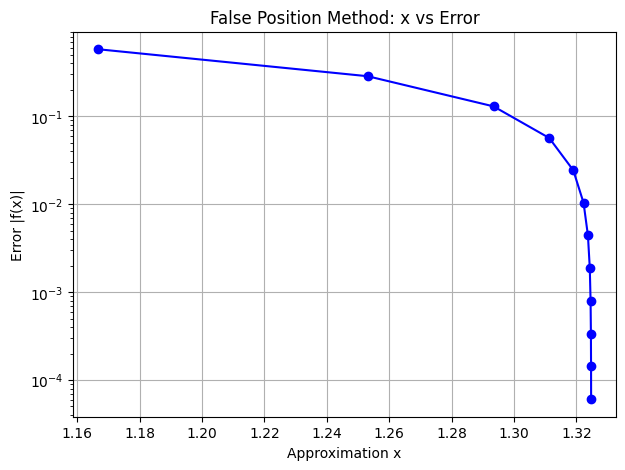

In [ ]:
x_values = [it[1] for it in iter_table]
errors = [it[3] for it in iter_table]
plt.figure(figsize=(7,5))
plt.plot(x_values, errors, marker='o', linestyle='-', color='blue')
plt.xlabel("Approximation x")
plt.ylabel("Error |f(x)|")
plt.title("False Position Method: x vs Error")
plt.yscale('log')  # optional: log scale for better visualization
plt.grid(True)
plt.show()

Limitations:
* It's required to know the interval where the function changes f(a) * f(b) < 0 (like bisection)
* Slow

# MULLERS METHOD


Making a quadratic equation by finding a,b,c using initial 3 points close to the root

In [ ]:
def muller(f,x0,x1,x2,tol,num):
  iterations = []
  for i in range(1,num+1):
    y0 = f(x0)
    y1 = f(x1)
    y2 = f(x2)
    h0 = x1 - x0
    h1 = x2 - x1
    delta0 = (y1 - y0) / h0
    delta1 = (y2 - y1) / h1
    a = (delta1 - delta0) / (h1 + h0)
    b = a * h1 + delta1
    c = y2
    # a = ((y1-y0) * (x2-x0) - (y2-y0) * (x1-x0) ) / ((x1-x0) * (x2-x0) * (x1-x2))
    # b = ((y1-y0) * pow(x2-x0, 2) - (y1-y0) * pow(x2-x0,2)) / ((x1-x0) * (x2-x0) * (x1-x2))
    # c = y0
    discr = b**2 - 4*a*c
    if discr < 0:
      return x2,iterations, "Complex root"
    sqrt_discr = pow(discr,1/2)
    if abs(b + sqrt_discr) > abs(b - sqrt_discr):
      denom = b + sqrt_discr
    else:
      denom = b - sqrt_discr
    x3 = x2 - ((2*c) / denom)
    error = abs(f(x3))
    iterations.append((i, x3, f(x3), error))
    if error < tol:
      return x3, iterations, "Tolerance reached"
    x0, x1, x2 = x1, x2, x3
  return x3, iterations, "Max iterations reached"

In [ ]:
root, iter_table, status = muller(f, 1, 1.5, 2, tolerance, num_of_iterations)
print(f"Root is {root}")
print(status)
make_table(iter_table)

Root is 1.3247182939004816
Tolerance reached


,Iteration,Approximation,f(x),Error
0,1,1.333333,0.037037,0.037037
1,2,1.324472,-0.001051,0.001051
2,3,1.324718,0.000001,0.000001


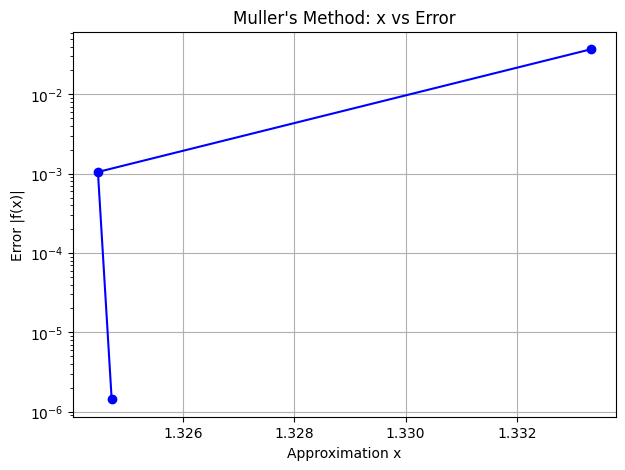

In [ ]:
x_values = [it[1] for it in iter_table]
errors = [it[3] for it in iter_table]

# Plot x vs error
plt.figure(figsize=(7,5))
plt.plot(x_values, errors, marker='o', linestyle='-', color='blue')
plt.xlabel("Approximation x")
plt.ylabel("Error |f(x)|")
plt.title("Muller's Method: x vs Error")
plt.yscale('log')
plt.grid(True)
plt.show()

Limitations:
* More computation for each iteration
* Complex roots
* 3 Initial points are required

# CONCLUSION

| Method          | Root                | No. of iterations |
|-----------------|---------------------|-------------------|
| Bisection       | 1.32476806640625    | 14                |
| Fixed Point     | 1.3247017485103587  | 6                 |
| Newton Raphson  | 1.3247179572447898  | 5                 |
| Secant          | 1.3247179572446703  | 7                 |
| False Position  | 1.3247037764713758  | 12                |
| Muller's        | 1.3247182939004816  | 3                 |

**The fastest method** was Muller's (3 iterations) and Newton Raphson (5). Muller's method was faster due to having initial 3 points (1, 1.5, 2)and Newton having only one point (1) which was further from the root (1.3247)

**The slowest method** was Bisection (14)

What to consider: correctly picking g(x)